In [23]:
import numpy as np

In [24]:
class Linear_Regression():

  #initializing the parameters
  def __init__(self, learning_rate, no_of_iteration):
    self.learning_rate = learning_rate
    self.no_of_iteration = no_of_iteration

  #X is year of experience(independent variable) and y is salary(dependent variable)
  def fit(self, X, y):
    #number of training examples & number of features
    self.m, self.n = X.shape
    #number of training(m) rows
    #number of feature(n colums)(1 because year of experience is the  feature and salary is target)
    #initiating weight and bias
    self.w = np.zeros(self.n)    #w will be decide on the number of features
    self.b = 0
    self.X = X
    self.y = y

    for i in range(self.no_of_iteration):
      self.update_weight()


  def update_weight(self):
    Y_prediction = self.predict(self.X)

    #calculate gradients

    dw = -(2 * (self.X.T).dot(self.y - Y_prediction)) / self.m

    db = -(2 * np.sum(self.y - Y_prediction))

    #updating the weights
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db


  def predict(self, X):
    return X.dot(self.w) +self.b


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Data Preprocessing

In [26]:
#loading the data from csv file to pandas dataframe

salary_data = pd.read_csv(r'C:\Users\DELL\Desktop\ml\Linear-Regression\salary_data.csv')

In [27]:
# first 5 rows of dataFrame
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [28]:
# last 5 rows of dataFrame
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [29]:
salary_data.shape

(30, 2)

In [30]:
# chceking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

#Splitting the feature & target

In [31]:
X = salary_data.iloc[:,:-1].values
y = salary_data.iloc[:,1].values

In [32]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [33]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


#Splitting dataset into train and test datasets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.33, random_state= 2)

#Train linear regression model

In [39]:
model = Linear_Regression(learning_rate = 0.001 , no_of_iteration = 1000)

In [40]:
model.fit(X_train,y_train)

In [41]:
# print parameter values(w & b)
print('weight value:', model.w[0])
print('bias value:', model.b)


weight value: 9510.991286224767
bias value: 23720.914182879693


y = 9511*(x) + 23721

Predict the salary of test data

In [43]:
test_data_prediction = model.predict(X_test)

In [44]:
print(test_data_prediction)

[ 36085.20285497  34183.00459773  66520.37497089  58911.58194191
  91248.95231508  80786.86190023 101711.04272992  52253.88804155
  42742.89675533  88395.65492921]


Visualizing the predicted values and actual values

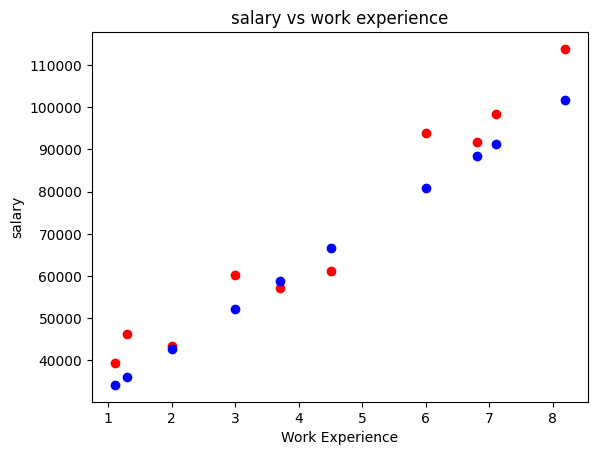

In [46]:
plt.scatter(X_test,y_test,color = 'red')
plt.scatter(X_test, test_data_prediction, color = 'blue')
plt.xlabel('Work Experience')
plt.ylabel('salary')
plt.title("salary vs work experience")
plt.show()